# Cargar y manipulación de datos

In [2]:
import pandas as pd
from tabulate import tabulate

In [ ]:
# Leer el archivo CSV
data = pd.read_csv('archivo.csv')

# Mostrar los primeros 5 registros
print(data.head())

# Mostrar los últimos 5 registros
print(data.tail())

### 🔵 Cambiar el delimitador de campos

Por defecto, Pandas utiliza la coma (,) como **delimitador.** Para cambiarlo, usamos el parámetro `sep` o `delimiter`.

In [ ]:
data = pd.read_csv('archivo.tsv', sep='\t')

### 🔴 Especificar la codificación del archivo

Utiliza el **parámetro** encoding para indicar la **codificación** del archivo, por ejemplo, `utf-8`, **** `latin-1` o  `ISO-8859-1`

In [ ]:
data = pd.read_csv('archivo.csv', encoding='ISO-8859-1')

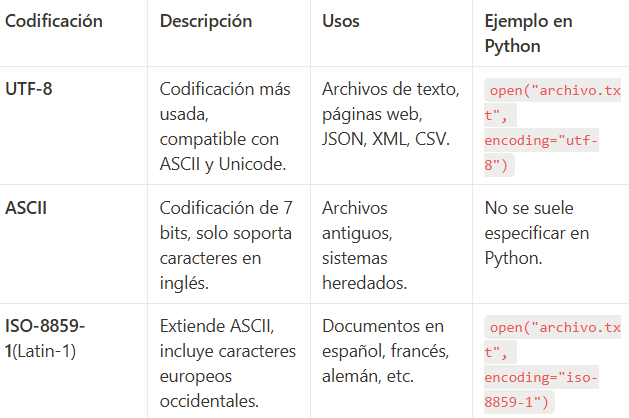

### 🔵 Leer un archivo CSV sin cabecera

Si el archivo CSV **no tiene una fila de encabezado**, usamos el parámetro `header=None`.


In [ ]:
data = pd.read_csv('archivo_sin_cabecera.csv', header=None)

### 🔴 Asignar nombres de columnas personalizados

Utiliza el parámetro `names` para proporcionar una lista de **nombres de columnas**.

In [ ]:
columnas = ['nombre', 'edad', 'ciudad']
data = pd.read_csv('archivo_sin_cabecera.csv', header=None, names=columnas)

### 🔵 Saltar filas al inicio del archivo

Usa el parámetro `skiprows` para **saltar un número específico de filas** al principio del archivo.

In [ ]:
data = pd.read_csv('archivo.csv', skiprows=2)

### 🔵 Leer solo un número específico de filas

Utilizamos el parámetro `nrows` para leer solo un **número específico de filas**.

In [ ]:
#Leer solo las 10 primeras filas
data = pd.read_csv('archivo.csv', nrows=10)

# Ajustar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

### 🔵 Dar formato de tabla a la salida del CSV

Usa el método `tabulate` para **especificar diferentes formatos**.

In [ ]:

print(tabulate(data, headers='keys', tablefmt='psql'))

- **`"plain"`**: Sin ningún borde o formato especial.
- **`"simple"`**: Formato simple con bordes.
- **`"grid"`**: Con bordes en cada celda.
- **`"fancy_grid"`**: Similar al `grid`, pero con bordes más estilizados.
- **`"pipe"`**: Utiliza barras `|` para separar las columnas, similar a Markdown.
- **`"orgtbl"`**: Formato tipo Org-mode de Emacs.
- **`"tsv"`**: Para tablas delimitadas por tabulaciones (útil para archivos TSV).
- **`"html"`**: Para exportar la tabla en formato HTML.
- **`"latex"`**: Para exportar la tabla en formato LaTeX.
- **`"latex_raw"`**: Para exportar sin procesar en formato LaTeX.
- **`"rst"`**: Para exportar en reStructuredText.
- **`"mediawiki"`**: Para exportar en formato MediaWiki.
- **`"jira"`**: Formato de tabla usado por JIRA.
- **`"presto"`**: Formato con una estructura similar al formato de Presto.

### 🔴 Mergear columnas de dos DataFrames

El método `merge()` en pandas se utiliza para **combinar dos DataFrames en función de una o más columnas comunes**, similar a una operación de **join** en bases de datos. Puedes especificar el tipo de combinación (por ejemplo, interna, externa, izquierda o derecha) y qué columnas utilizar como claves para la fusión. Esta es su sintaxis:

In [ ]:
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)

- `left`: El primer DataFrame.
- `right`: El segundo DataFrame.
- `how`: Tipo de fusión:
    - `'inner'`: Solo las filas que tienen claves coincidentes en ambos DataFrames (intersección).
    - `'outer'`: Mantiene todas las filas de ambos DataFrames, rellenando con `NaN` donde no haya coincidencias.
    - `'left'`: Mantiene todas las filas del DataFrame izquierdo, rellenando con `NaN` donde no haya coincidencias en el derecho.
    - `'right'`: Mantiene todas las filas del DataFrame derecho, rellenando con `NaN` donde no haya coincidencias en el izquierdo.
- `on`: Nombre de la columna clave en común para realizar la fusión (solo si ambas columnas se llaman igual).
- `left_on` y `right_on`: Especifican las columnas clave a utilizar de cada DataFrame si tienen nombres diferentes.
- `left_index` y `right_index`: Si se establece en `True`, usa los índices de los DataFrames como claves para la fusión.

In [10]:
# DataFrames de ejemplo
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Nombre': ['Ana', 'Luis', 'Pedro', 'Marta']
})

df2 = pd.DataFrame({
    'ID': [3, 4, 5],
    'Salario': [25000, 45000, 35000]
})

# Fusión de ambos DataFrames por la columna 'ID' (común)
df_merged = pd.merge(df1, df2, how='inner', on='ID')
print(tabulate(df_merged, headers='keys', tablefmt='psql'))

# Fusión externa para mantener todos los datos
df_merged_outer = pd.merge(df1, df2, how='outer', on='ID')
print(tabulate(df_merged_outer, headers='keys', tablefmt='psql'))

# Fusión utilizando diferentes nombres de columnas
df1 = pd.DataFrame({
    'ID_cliente': [1, 2, 3, 4],
    'Nombre': ['Ana', 'Luis', 'Pedro', 'Marta']
})

df2 = pd.DataFrame({
    'ID_usuario': [3, 4, 5],
    'Salario': [25000, 45000, 35000]
})

# Fusión utilizando las columnas 'ID_cliente' de df1 y 'ID_usuario' de df2
df_merged_diff_columns = pd.merge(df1, df2, how='inner', left_on='ID_cliente', right_on='ID_usuario')
print(tabulate(df_merged_diff_columns, headers='keys', tablefmt='psql'))


+----+------+----------+-----------+
|    |   ID | Nombre   |   Salario |
|----+------+----------+-----------|
|  0 |    3 | Pedro    |     25000 |
|  1 |    4 | Marta    |     45000 |
+----+------+----------+-----------+
+----+------+----------+-----------+
|    |   ID | Nombre   |   Salario |
|----+------+----------+-----------|
|  0 |    1 | Ana      |       nan |
|  1 |    2 | Luis     |       nan |
|  2 |    3 | Pedro    |     25000 |
|  3 |    4 | Marta    |     45000 |
|  4 |    5 | nan      |     35000 |
+----+------+----------+-----------+
+----+--------------+----------+--------------+-----------+
|    |   ID_cliente | Nombre   |   ID_usuario |   Salario |
|----+--------------+----------+--------------+-----------|
|  0 |            3 | Pedro    |            3 |     25000 |
|  1 |            4 | Marta    |            4 |     45000 |
+----+--------------+----------+--------------+-----------+


Puedes utilizar ``concat()`` para realizar tareas similares a las de ``merge()``, pero sin necesidad de claves comunes entre los DataFrames. ``concat()`` se utiliza para combinar los DataFrames por filas o por columnas sin preocuparse de las claves. Su sintaxis es la siguiente:

In [8]:
pd.concat([df1, df2], axis=0, ignore_index=False)

,ID_cliente,Nombre,ID_usuario,Salario
0,1.0,Ana,NaN,NaN
1,2.0,Luis,NaN,NaN
2,3.0,Pedro,NaN,NaN
3,4.0,Marta,NaN,NaN
0,NaN,NaN,3.0,25000.0
1,NaN,NaN,4.0,45000.0
2,NaN,NaN,5.0,35000.0


- `axis=0`: Para concatenar filas (verticalmente).
- `axis=1`: Para concatenar columnas (horizontalmente).
- `ignore_index=True`: Si se establece en `True`, se reinicia el índice en el DataFrame resultante.

In [9]:
# Crear DataFrames con columnas diferentes
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Nombre': ['Ana', 'Luis', 'Pedro', 'Marta']
})

df2 = pd.DataFrame({
    'Salario': [25000, 45000, 35000, 40000],
    'Edad': [28, 34, 22, 40]
})

# Concatenar los DataFrames por columnas (axis=1), aunque no coincidan las columnas
df_concat_diff_cols = pd.concat([df1, df2], axis=1)
print(tabulate(df_concat_diff_cols, headers='keys', tablefmt='psql'))

# Crear dos DataFrames con columnas diferentes
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Nombre': ['Ana', 'Luis', 'Pedro', 'Marta']
})

df2 = pd.DataFrame({
    'Salario': [25000, 45000, 35000, 40000]
})

# Concatenar los DataFrames por columnas (axis=1)
df_concat_col = pd.concat([df1, df2], axis=1)
print(tabulate(df_concat_col, headers='keys', tablefmt='psql'))


+----+------+----------+-----------+--------+
|    |   ID | Nombre   |   Salario |   Edad |
|----+------+----------+-----------+--------|
|  0 |    1 | Ana      |     25000 |     28 |
|  1 |    2 | Luis     |     45000 |     34 |
|  2 |    3 | Pedro    |     35000 |     22 |
|  3 |    4 | Marta    |     40000 |     40 |
+----+------+----------+-----------+--------+
+----+------+----------+-----------+
|    |   ID | Nombre   |   Salario |
|----+------+----------+-----------|
|  0 |    1 | Ana      |     25000 |
|  1 |    2 | Luis     |     45000 |
|  2 |    3 | Pedro    |     35000 |
|  3 |    4 | Marta    |     40000 |
+----+------+----------+-----------+


### 🔴 Obtener estadísticas e información

Usa el método `.describe()` para **obtener estadísticas descriptivas de columnas numéricas**.

In [ ]:
# Crear un DataFrame de ejemplo
data = {'Edad': [25, 30, 35, 40, 45], 'Salario': [30000, 35000, 40000, 45000, 50000]}
df = pd.DataFrame(data)

#Imprimir las estadísticas del DataFrame
print(df.describe())

# Aplicar .describe() a la columna 'Edad'
descripcion_edad = df['Edad'].describe()

# Mostrar las estadísticas de la columna edad
print(descripcion_edad)

### 🔴 Organizar valores de una columna

Usa el método `.sort_values()` para **organizar datos**.

In [ ]:
# Crear un DataFrame de ejemplo
data = {
    'Nombre': ['Ana', 'Luis', 'Pedro', 'Marta', 'Sofía'],
    'Edad': [25, 30, 22, 28, 35],
    'Salario': [30000, 50000, 25000, 45000, 40000]
}

df = pd.DataFrame(data)

# Ordenar por una sola columna en orden ascendente (por defecto)
df_ordenado = df.sort_values(by='Edad')
print("Ordenado por Edad (ascendente):\n", df_ordenado, "\n")

# Ordenar por una sola columna en orden descendente
df_ordenado_desc = df.sort_values(by='Salario', ascending=False)
print("Ordenado por Salario (descendente):\n", df_ordenado_desc, "\n")

# Ordenar por múltiples columnas (primero por edad, luego por salario en orden descendente)
df_multi = df.sort_values(by=['Edad', 'Salario'], ascending=[True, False])
print("Ordenado por Edad (ascendente) y Salario (descendente):\n", df_multi, "\n")

# Ordenar sin reindexar los índices originales
df_sin_reset = df.sort_values(by='Edad', ascending=True, ignore_index=False)
print("Ordenado por Edad sin cambiar los índices:\n", df_sin_reset, "\n")

# Ordenar y resetear los índices
df_reset = df.sort_values(by='Edad', ascending=True, ignore_index=True)
print("Ordenado por Edad con índices reiniciados:\n", df_reset, "\n")

# Ordenar con valores NaN presentes en los datos
data_nan = {
    'Nombre': ['Ana', 'Luis', 'Pedro', 'Marta', 'Sofía'],
    'Edad': [25, 30, None, 28, 35],  # Hay un valor NaN en la edad de Pedro
    'Salario': [30000, 50000, 25000, None, 40000]  # También hay un NaN en el salario de Marta
}

df_nan = pd.DataFrame(data_nan)

# Ordenar colocando los NaN al final (default)
df_nan_sorted = df_nan.sort_values(by='Edad', ascending=True, na_position='last')
print("Ordenado por Edad con NaN al final:\n", df_nan_sorted, "\n")

# Ordenar colocando los NaN al inicio
df_nan_sorted_first = df_nan.sort_values(by='Edad', ascending=True, na_position='first')
print("Ordenado por Edad con NaN al inicio:\n", df_nan_sorted_first, "\n")


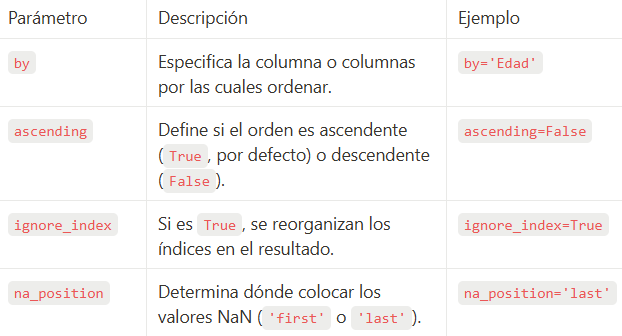

### 🔴 Agrupar valores del CSV

Usa el método `.groupby()` para **agrupar valores y aplicar métodos**.

In [12]:
# Crear un DataFrame de ejemplo
data = {
    'Departamento': ['Ventas', 'Ventas', 'IT', 'IT', 'RRHH', 'RRHH', 'Ventas'],
    'Empleado': ['Ana', 'Luis', 'Pedro', 'Marta', 'Sofía', 'Carlos', 'David'],
    'Salario': [30000, 50000, 60000, 55000, 40000, 42000, 48000],
    'Edad': [25, 30, 40, 35, 28, 45, 32]
}

df = pd.DataFrame(data)

# Agrupar por una columna y calcular la media de otra
salario_promedio = df.groupby('Departamento')['Salario'].mean()
print("Salario promedio por departamento:\n", salario_promedio, "\n")

# Agrupar por una columna y contar cuántos empleados hay en cada departamento
conteo_empleados = df.groupby('Departamento')['Empleado'].count()
print("Número de empleados por departamento:\n", conteo_empleados, "\n")

# Agrupar por una columna y aplicar múltiples funciones a otra
estadisticas_salario = df.groupby('Departamento')['Salario'].agg(['mean', 'max', 'min'])
print("Estadísticas del salario por departamento:\n", estadisticas_salario, "\n")

# Agrupar por varias columnas (Departamento y Edad agrupada en rangos)
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=[20, 30, 40, 50], labels=['20-30', '30-40', '40-50'])
grupo_edad_salario = df.groupby(['Departamento', 'Grupo_Edad'])['Salario'].mean()
print("Salario promedio por departamento y grupo de edad:\n", grupo_edad_salario, "\n")

# Agrupar y obtener el primer valor de cada grupo
primer_empleado = df.groupby('Departamento').first()
print("Primer empleado de cada departamento:\n", primer_empleado, "\n")

# Agrupar y recorrer cada grupo con un bucle
print("Recorriendo los grupos manualmente:")
for departamento, grupo in df.groupby('Departamento'):
    print(f"\nDepartamento: {departamento}")
    print(grupo)

Salario promedio por departamento:
 Departamento
IT        57500.000000
RRHH      41000.000000
Ventas    42666.666667
Name: Salario, dtype: float64 

Número de empleados por departamento:
 Departamento
IT        2
RRHH      2
Ventas    3
Name: Empleado, dtype: int64 

Estadísticas del salario por departamento:
                       mean    max    min
Departamento                            
IT            57500.000000  60000  55000
RRHH          41000.000000  42000  40000
Ventas        42666.666667  50000  30000 

Salario promedio por departamento y grupo de edad:
 Departamento  Grupo_Edad
IT            20-30             NaN
              30-40         57500.0
              40-50             NaN
RRHH          20-30         40000.0
              30-40             NaN
              40-50         42000.0
Ventas        20-30         40000.0
              30-40         48000.0
              40-50             NaN
Name: Salario, dtype: float64 

Primer empleado de cada departamento:
         

C:\Users\SergioSF\AppData\Local\Temp\ipykernel_21120\3199524782.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_edad_salario = df.groupby(['Departamento', 'Grupo_Edad'])['Salario'].mean()


Es común usar la variable ``grouped`` para trabajar con los datados agrupados a través del método ``.groupby() ``

In [13]:
# Crear un DataFrame de ejemplo
data = {
    'Departamento': ['Ventas', 'Ventas', 'IT', 'IT', 'RRHH', 'RRHH', 'Ventas'],
    'Empleado': ['Ana', 'Luis', 'Pedroy ', 'Marta', 'Sofía', 'Carlos', 'David'],
    'Salario': [30000, 50000, 60000, 55000, 40000, 42000, 48000],
    'Edad': [25, 30, 40, 35, 28, 45, 32]
}

df = pd.DataFrame(data)

# Guardamos el objeto agrupado en una variable `grouped`
grouped = df.groupby('Departamento')

# Podemos inspeccionar los grupos con .groups
print("Grupos creados:\n", grouped.groups, "\n")

# Obtener el grupo de 'Ventas' directamente
ventas_group = grouped.get_group('Ventas')
print("Datos del grupo Ventas:\n", ventas_group, "\n")

# Aplicar funciones al objeto `grouped`
salario_promedio = grouped['Salario'].mean()
print("Salario promedio por departamento:\n", salario_promedio, "\n")

# Recorrer los grupos usando un bucle
print("Recorriendo los grupos manualmente:")
for departamento, grupo in grouped: # Descomponemos cada grupo en dos partes: la clave del grupo (el nombre del departamento) y el propio grupo (un sub-DataFrame con las filas que tienen ese valor en la columna 'Departamento')
    print(f"\nDepartamento: {departamento}")
    print(grupo)

Grupos creados:
 {'IT': [2, 3], 'RRHH': [4, 5], 'Ventas': [0, 1, 6]} 

Datos del grupo Ventas:
   Departamento Empleado  Salario  Edad
0       Ventas      Ana    30000    25
1       Ventas     Luis    50000    30
6       Ventas    David    48000    32 

Salario promedio por departamento:
 Departamento
IT        57500.000000
RRHH      41000.000000
Ventas    42666.666667
Name: Salario, dtype: float64 

Recorriendo los grupos manualmente:

Departamento: IT
  Departamento Empleado  Salario  Edad
2           IT  Pedroy     60000    40
3           IT    Marta    55000    35

Departamento: RRHH
  Departamento Empleado  Salario  Edad
4         RRHH    Sofía    40000    28
5         RRHH   Carlos    42000    45

Departamento: Ventas
  Departamento Empleado  Salario  Edad
0       Ventas      Ana    30000    25
1       Ventas     Luis    50000    30
6       Ventas    David    48000    32


### 🔴 Filtra datos o realiza cambios basándote en condiciones

El método `where()` en **pandas** se utiliza para **filtrar y reemplazar valores en un DataFrame o Serie** donde no se cumple una condición especificada. Su sintaxis es:

In [ ]:
DataFrame.where(condición, other=valor_reemplazo, axis=None, inplace=False, level=None, errors='raise', try_cast=False)

- **`condición`**: Es la condición que se evalúa en cada elemento del DataFrame o Serie. Los valores que no cumplen con la condición se reemplazarán.
- **`other`**: El valor con el que se reemplazarán los elementos que no cumplen la condición. Si no se especifica, los valores que no cumplen la condición serán reemplazados por `NaN`.
- **`axis`**: Dirección en la que se aplica la condición. Puede ser `0` (por filas), `1` (por columnas) o `None` para aplicar la condición de forma global.
- **`inplace`**: Si se establece en `True`, realiza la operación directamente en el objeto sin necesidad de crear uno nuevo. El valor por defecto es `False`, lo que significa que se devuelve una nueva copia.
- **`level`**: Si se trabaja con un DataFrame con índices jerárquicos (multindex), especifica el nivel en el que aplicar la condición.
- **`errors`**: Define qué hacer en caso de error. Si es `'raise'`, lanza una excepción; si es `'ignore'`, no hace nada si la condición no es válida.
- **`try_cast`**: Si se establece en `True`, intenta convertir los datos de salida al tipo adecuado.

In [ ]:
# DataFrame de ejemplo
df = pd.DataFrame({
    'A': [10, 60, 30, 90],
    'B': [40, 20, 80, 50]
})

# Aplicamos where para reemplazar valores menores que 50 por NaN
df_where = df.where(df > 50)
print(df_where)

# Reemplazar valores menores que 50 por 0
df_where_other = df.where(df > 50, other=0)
print(df_where_other)

# Aplicar where a una columna (Serie)
df['A'] = df['A'].where(df['A'] > 50, other=100)
print(df)



### 🔴 Asignar columnas como índices en un CSV

En pandas, el índice no es solo un identificador de filas o columnas, sino que optimiza el acceso a los datos y facilita operaciones avanzadas. Sobretodo, cuando se utilizan identificadores únicos como índices

Imagina que tenemos el siguiente CSV:

In [19]:
# Crear un DataFrame
data = pd.DataFrame({
    "nombre": ["Ana", "Luis", "Carlos", "Marta"],
    "edad": [25, 30, 40, 22],
    "ciudad": ["Madrid", "Barcelona", "Sevilla", "Valencia"]
})

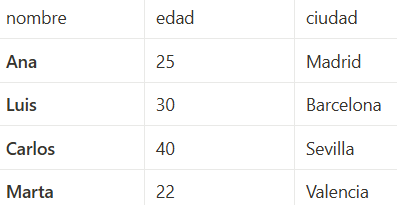

Utiliza el parámetro ``index_col`` para especificar una columna como índice (le da un índice a cada fila).

In [ ]:
 data = pd.read_csv('archivo.csv', index_col='nombre') # La columna "nombre" será el índice del DataFrame.

También se puede establecer una columna como index usando ``set_index()``:

In [ ]:
# Cambiar el índice a la columna "nombre"
data = data.set_index("nombre")
print(data)

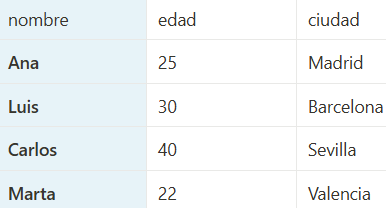

También podemos quitar el índice y volver a usar números con ``reset_index()``:

In [ ]:
data = data.reset_index()
print(data)

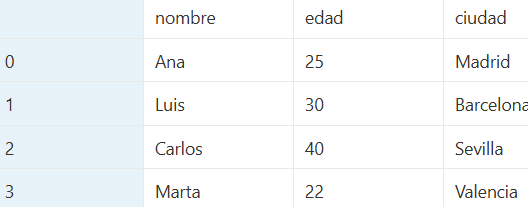

Podemos usar ``reindex()`` para modificar el orden del índice:

In [ ]:
data = data.set_index("nombre").reindex(["Marta", "Carlos", "Luis", "Ana"])
print(data)

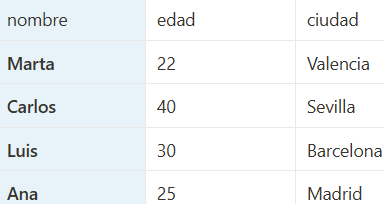

Por último, podemos asignar un index manualmente a las filas usando ``.index``:

In [ ]:
data.index = ["ID1", "ID2", "ID3", "ID4"]
print(data)

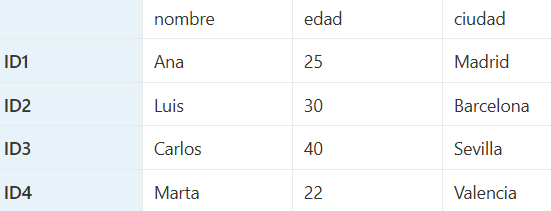

### 🔴 Acceder a columnas, filas y elementos específicos en un Dataframe

Usa el parámetro `usecols` para cargar solo **columnas específicas**.

In [ ]:
data = pd.read_csv('archivo.csv', usecols=['nombre', 'edad'])

Usa el método ``.loc[fila,columna]`` para seleccionar datos por etiquetas (nombre del índice o columna)

In [ ]:
# Crear DataFrame
df = pd.DataFrame({
    "nombre": ["Ana", "Luis", "Carlos", "Marta"],
    "edad": [25, 30, 40, 22],
    "ciudad": ["Madrid", "Barcelona", "Sevilla", "Valencia"]
})

# Establecer "nombre" como índice
df = df.set_index("nombre")

# Seleccionar una fila por su índice
df.loc["Luis"]

# Seleccionar una celda específica
df.loc["Carlos", "edad"]

# Seleccionar varias filas y columnas por etiquetas
df.loc[["Ana", "Marta"], ["edad", "ciudad"]]

#Seleccionar todas las filas de una columna
df.loc[:, "ciudad"]


Usa el método ``.iloc[fila,columna]`` para selecciona datos por posición numérica (índice de la fila o columna).

In [ ]:
# Seleccionar la primera fila
df.iloc[0]

#Seleccionar un valor específico
df.iloc[2, 1]  # Tercera fila (Carlos), segunda columna (ciudad)

#Seleccionar un rango de filas y columnas
df.iloc[1:3, 0:2]  # Filas 1 y 2, columnas 0 y 1

Usa `.at[fila, columna]` si necesitas **realizar una selección por etiqueta (solo una celda)**

In [6]:
# Crear DataFrame
df = pd.DataFrame({
    "nombre": ["Ana", "Luis", "Carlos", "Marta"],
    "edad": [25, 30, 40, 22],
    "ciudad": ["Madrid", "Barcelona", "Sevilla", "Valencia"]
})

# Establecer "nombre" como índice
df = df.set_index("nombre")

# Acceder a un único valor usando .at[]
edad_luis = df.at["Luis", "edad"]
print(edad_luis) 

30


Utiliza ``.iat[fila, columna]`` para realizar una selección por posición numérica (solo una celda)

In [ ]:
# Acceder a un único valor usando .iat[]
edad_primera_fila = df.iat[1, 1]  # Segunda fila, segunda columna
print(edad_primera_fila)  

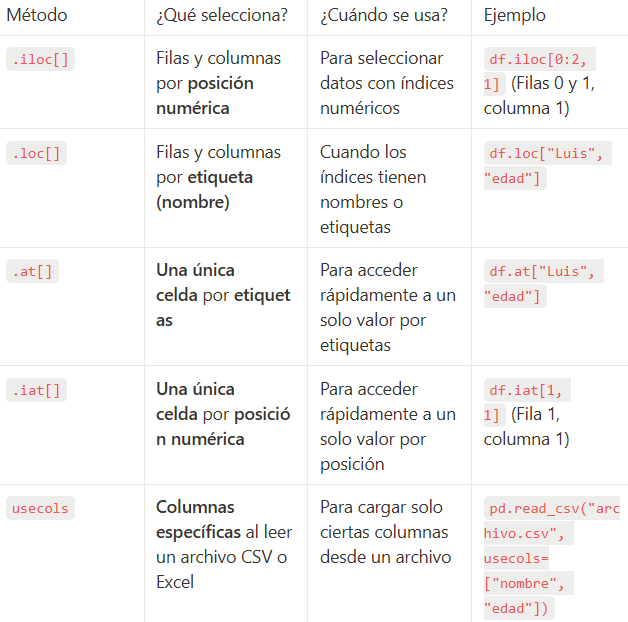

### 🔴 Aplicar funciones en un DataFrame o Serie

Tanto `.apply()` como `.map()` en pandas se utilizan para **aplicar funciones a los datos de un DataFrame o una Serie**, pero tienen diferencias importantes en su uso:

Utilizamos `map()` de la siguiente forma:

- Solo se usa en **Series** (no en DataFrames).
- Se aplica elemento por elemento.
- Puede aceptar:
    - Una **función** (lambda u otra función definida).
    - Un **diccionario** para hacer sustituciones.
    - Una **Serie** para realizar mapeos basados en valores.

In [ ]:
# LO PODEMOS UTILIZAR PARA APLICAR VALORES EN SERIES: 
s = pd.Series([1, 2, 3, 4, 5])

# Multiplicar cada elemento por 2
s_double = s.map(lambda x: x * 2)
print(s_double)

# O PARA REEMPLAZAR VALORES:
s = pd.Series(['a', 'b', 'c', 'd'])
mapping_dict = {'a': 'alpha', 'x': 'beta', 'c': 'gamma'} # Si una clave no está en el diccionario devuelve NaN

s_mapped = s.map(mapping_dict)
print(s_mapped)

0     2
1     4
2     6
3     8
4    10
dtype: int64
0    alpha
1      NaN
2    gamma
3      NaN
dtype: object


Por otro lado, con `apply()`:

- Puede usarse en **Series y DataFrames**.
- En una **Serie**, funciona similar a `map()`, pero permite funciones más complejas.
- En un **DataFrame**, puede aplicarse a filas o columnas completas (`axis=0` para columnas, `axis=1` para filas).
- Permite aplicar funciones que necesitan múltiples columnas o realizar cálculos más avanzados.

In [4]:
# APPLY() EN UNA SERIE
s = pd.Series([1, 2, 3, 4, 5])

# Elevar al cuadrado cada elemento
s_applied = s.apply(lambda x: x ** 2)
print(s_applied)

# APPLY() EN UNA DATAFRAME

df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Aplicar una función a cada fila (sumar A y B)
df['Suma'] = df.apply(lambda row: row['A'] + row['B'], axis=1)
print(df)

# Aplicar una función a cada columna (elevar al cuadrado)
df_applied = df.apply(lambda col: col**2, axis=0)
print(df_applied)

# Aplicar funciones diferentes a cada columna
df_transformed = df.apply(lambda col: col**2 if col.name == 'A' else col*2)
print(df_transformed)


0     1
1     4
2     9
3    16
4    25
dtype: int64
   A  B  Suma
0  1  4     5
1  2  5     7
2  3  6     9
   A   B  Suma
0  1  16    25
1  4  25    49
2  9  36    81
   A   B  Suma
0  1   8    10
1  4  10    14
2  9  12    18


### 🔴 Casting de datos

La función **`astype()`** de Pandas se utiliza para **convertir el tipo de datos** de una Serie o DataFrame a un tipo específico. Es muy útil cuando necesitas cambiar el tipo de datos de una columna para realizar operaciones o análisis más precisos. Su sintaxis es la siguiente:

In [ ]:
DataFrame.astype(dtype, copy=True, errors='raise')

- **`dtype`**: Especifica el tipo de datos al que deseas convertir. Puede ser un tipo de datos de Python (como `int`, `float`, `str`), un tipo de datos de NumPy (como `np.float64`, `np.int32`), o un diccionario que asigne columnas específicas a un tipo.
- **`copy`**: Por defecto, es `True`, lo que significa que se creará una nueva copia del objeto con el tipo de datos convertido. Si se establece en `False`, la conversión se realizará en el mismo objeto.
- **`errors`**: Puede ser `'raise'` (por defecto) para lanzar un error si no se puede realizar la conversión, o `'ignore'` para suprimir cualquier error que ocurra durante la conversión.

In [5]:
# Crear una Serie con datos de tipo string
serie = pd.Series(['1', '2', '3', '4', '5'])

# Convertir la Serie de string a entero
serie_convertida = serie.astype(int)

print(serie_convertida)

# Crear un DataFrame
df = pd.DataFrame({
    'Edad': ['25', '30', '35', '40', '45'],
    'Salario': ['30000', '35000', '40000', '45000', '50000']
})

# Convertir ambas columnas a tipo numérico
df['Edad'] = df['Edad'].astype(int)
df['Salario'] = df['Salario'].astype(int)

print(df)

# Especificar diferentes tipos para cada columna utilizando un diccionario

df = pd.DataFrame({
    'Edad': ['25', '30', '35', '40', '45'],
    'Salario': ['30000', '35000', '40000', '45000', '50000']
})

# Convertir 'Edad' a entero y 'Salario' a flotante
df = df.astype({'Edad': 'int', 'Salario': 'float'})

print(df)

# Intentar convertir una columna con valores no convertibles
df = pd.DataFrame({'valores': ['10', '20', 'a', '40']})

# Intentar convertir a entero (esto lanzará un error)
# df['valores'] = df['valores'].astype(int)  # Esto lanza un error

# Usando errors='ignore' para no lanzar el error
df['valores'] = df['valores'].astype(int, errors='ignore')
print(df)

0    1
1    2
2    3
3    4
4    5
dtype: int64
   Edad  Salario
0    25    30000
1    30    35000
2    35    40000
3    40    45000
4    45    50000
   Edad  Salario
0    25  30000.0
1    30  35000.0
2    35  40000.0
3    40  45000.0
4    45  50000.0
  valores
0      10
1      20
2       a
3      40
